# Альтернативный экзамен

---



### Результат на 23.02.2025
- Переведена статья на русский язык : [переведённая статья](https://drive.google.com/file/d/1XGAOzG27n8BM3KewI5z6WaZlhDSPzoVD/view?usp=drive_link)
- проведены расчёты для n=4


# Теоретический анализ игры при n=4 k=2
###(игрок $A$ не знает о выборах игрока $B$)


1)Выигрышная стратегия игрока $A$:
- Игрок $A$ выбирает значения $v_1$ $v_2$. Его стратегия $a=(a_1,a_2)$ будет выигрышной если $\forall v_3,v_4$ выбранных игроком $B$, функция $F=(a_1,a_2,v_3,v_4)$=$true$
- Вероятность того, что конкретная стратегия $a$ является выигрышной равна $p^{2^{n-k}}=p^{2^2}=p^4$ так как игрок $B$ имеет $2^2=4$ возможных стратегии.

2)Вероятность существования выигрышной стратегии для игрока $A$:
- используя формулу из Теоремы 17, вероятность того, что у игрока $A$ есть хотя бы одна выигрышная стратегия, равна $$P(∃a\in2^{k}:win_{A}(a))=1-(1-p^{2^{n-k}})^{2^k}=1-(1-p^4)^4$$
- рассмотрим p=0.5, тогда:
$$1-(1-0.5^4)^4=1-(1-0.0625)^4≈0.228$$
- таким образом мы получили, что у игрока $A$ есть хотя бы одна выигрышная стратегия, составляет примерно $22.8\%$

3)Для игрока $B$ аналогично:
- вероятность существования хотя бы одной выигрышной стратегии, составляет $≈22.8\%$

4)Вероятность отсутсвия выигрышной стратегии ни у одного из игроков:
- Используя формулу из Следствия 19, вероятность того, что ни у игрока $A$, ни у игрока $B$ нет выигрышной стратегии равна: $$P(¬(∃a:win_{A}(a))∩¬(∃b:win_{B}(b)))=(1-p^{2^{k}})^{2^k}+(1-(1-p)^{2^k})^{2^{n-k}}-1$$
- рассмотрим p=0.5 и n=4 k=2: $P≈0.772+0.772-1=0.544$
- Таким образом, вероятность того, что ни у одного из игроков нет выигрышной стратегии, составляет примерно $54.4\%$

# Теоретический анализ игры при n=4, k=2 s=1,2

### (Игрок A знает о 1 выборе противника)

Вероятность существования гарантированной стратегии игрока $A$:
- используя формулу из Теоремы 24, вероятность того, что у игрока $A$ есть хотя бы одна выигрышная стратегия, равна $$P_{n;p}(∀b_{1:s}\in2^{s}: ∃a\in 2^k: win_{A}(a|b_{1:s}))=(1-(1-p^{2^{n-k-s}})^{2^k})^{2^s}$$
- рассмотрим p=0.5, тогда:$$(1-(1-0.5^{2})^4)^2≈0.467$$
- таким образом мы получили, что у игрока  A  есть хотя бы одна выигрышная стратегия, составляет примерно  46.7%

### (Игрок А знает о 2 выборах противника)

- используя формулу из Теоремы 24, вероятность того, что у игрока $A$ есть хотя бы одна выигрышная стратегия, равна $$P_{n;p}(∀b_{1:s}\in2^{s}: ∃a\in 2^k: win_{A}(a|b_{1:s}))=(1-(1-p^{2^{n-k-s}})^{2^k})^{2^s}$$
- рассмотрим p=0.5, тогда:$$(1-(1-0.5)^4)^4≈0.772$$
- таким образом мы получили, что у игрока  A  есть хотя бы одна выигрышная стратегия, составляет примерно  77.2%

---
### Далее напишем функции расчёта вероятностей существования стратегий выигрыша для игрока $A$
(Игрок А не знает о выборах игрока Б)

In [ ]:
pip install tabulate

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import os

In [ ]:
#python3
def calculate_win_a_exists(p : float, n : int, k : int, round_num : int = 3) -> float:
  result : float = 1 - (1 - p**(2**(n - k)))**(2**k)
  return round(result, round_num)

In [ ]:
#python3
def calculate_not_win_a_and_not_win_b(p : float, n : int, k : int, round_num : int = 3) -> float:
  result : float = (1 - p**(2**k))**(2**k) + (1 - (1 - p)**(2**k))**(2**(n - k)) - 1
  return round(result, round_num)

Было интересно пронаблюдать за графиками вероятности поэтому построим такие графики :

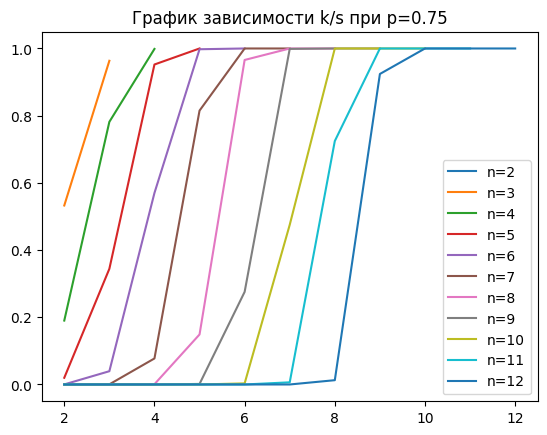

In [ ]:
#python3
def generate_graph_win_a(p : float, lim_n : int = 12) -> None:
  for n_itter in range(2, lim_n + 1):
    x_data : list[int] = [n for n in range(2, n_itter + 1)]
    y_data : list[float] = list(map(lambda x: calculate_win_a_exists(p=p, n=n_itter, k=x, round_num=10), [k for k in range(1,n_itter)]))
    plt.plot(x_data, y_data, label=f"n={n_itter}")
    plt.legend()
  plt.title(f"График зависимости k/s при p={p}")
  plt.show()
generate_graph_win_a(p=0.25)

(Игрок А знает о s выборах игрока Б)

In [ ]:
#python3
def calculate_win_a_exists_s(p : float, n : int, k : int, s : int, round_num : int = 20) -> float:
  result : float = (1 - (1 - p**(2**(n - k - s)))**(2**k))**(2**s)
  return round(result, round_num)

In [ ]:
def analysis_data_win_a_s(p: float, lim_n: int = 10, output_dir: str = "tables") -> None:
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for n in range(2, lim_n + 1):
        max_s = n
        k_values = list(range(1, n))
        s_values = list(range(1, max_s))

        table_data = []
        for s in s_values:
            row = []
            for k in k_values:
                if s <= n - k:
                    p_val = calculate_win_a_exists_s(p=p, n=n, k=k, s=s)
                    row.append(str(p_val))
                else:
                    row.append("")
            table_data.append(row)

        table_data = np.array(table_data, dtype=str)
        
        valid_columns = [i for i in range(len(k_values)) if any(table_data[:, i])]
        if not valid_columns:
            continue
        table_data = table_data[:, valid_columns]
        k_values = [k_values[i] for i in valid_columns]

        fig, ax = plt.subplots(figsize=(max(6, len(k_values) * 1.5), max(4, len(s_values) * 0.5)))
        ax.axis('off')

        table = ax.table(
            cellText=table_data,
            rowLabels=[f"s={s}" for s in s_values],
            colLabels=[f"k={k}" for k in k_values],
            loc='center',
            cellLoc='center',
            colWidths=[0.15] * len(k_values)
        )

        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)

        plt.title(f"Вероятности для n={n}, p={p}", fontsize=12, pad=20)

        output_path = os.path.join(output_dir, f"table_n_{n}.png")
        plt.savefig(output_path, bbox_inches='tight', dpi=150)
        plt.close(fig)
        print(f"Таблица для n={n} сохранена в {output_path}")

analysis_data_win_a_s(p=0.5, lim_n=12)